# Fashion MNIST Classification: Logistic Regression Neural Network vs SVM
### Comparing the accuracy of a logistic regression neural network vs suppport vector machine model to determine which model performs better.
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The follow labels indicate the 0: T-shirt/top,1: Trouser, 2: Pullover:3 Dress, 4: Coat, 5: Sandal,6: Shirt, 7: Sneaker, 8: Bag, 9: Ankle boot

## Importing Libraries

In [51]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import svm
from PIL import Image
from scipy import ndimage
from mpl_toolkits.axes_grid1 import ImageGrid

## Loading Data

In [17]:
#load data
fash = tf.keras.datasets.fashion_mnist.load_data()

In [36]:
#load training and testing data
(x_train, y_train), (x_test, y_test) = fash


x_train shape:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


In [59]:
print("x_train shape: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

m_train = x_train.shape[0]
m_test = x_test.shape[0]
num_px = x_train.shape[1]

print ("Number of training examples: ", m_train)
print ("Number of testing examples: ",m_test)
print ("Height and Width of each image: ", num_px)

x_train shape:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)
Number of training examples:  60000
Number of testing examples:  10000
Height/Width of each image: num_px =  28


## Exploring the Data

Here we will visualize what the images look like with their attached label. 

Function Source: Ross Beveridge MNIST

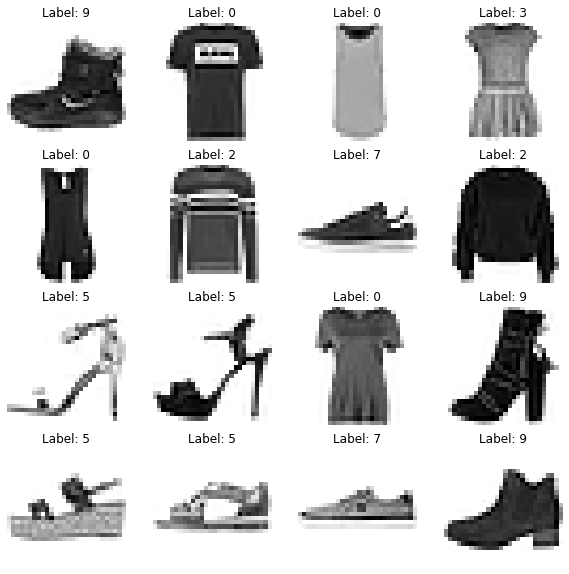

In [78]:
fig, axes = plt.subplots(4, 4, figsize=(10,10))

for i in range(4):
    for j in range(4):
        axes[i,j].imshow(x_train[i*4 + j, :, :], cmap='binary')
        axes[i,j].set_title("Label: " + str(y_train[i*4+j]))
        axes[i,j].axis('off')

plt.show()

## Setting up the Neural Network

In [63]:
#Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0],-1).T
x_test_flat = x_test.reshape(x_test.shape[0],-1).T

#Standardize the images
train_x = x_train_flat / 255.
test_x = x_test_flat / 255.

In [64]:
def sigmoid(p):
    s = 1/(1+np.exp(-p))
    return s

w, b = np.zeros((2,1)), 0.0

def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X) + b)                                     
    cost = -1/m * (np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1 - A).T))                             
    
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m
    
    cost = np.squeeze(cost)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
 
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
  
        grads, cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw 
        b = b - learning_rate*db
        

        if i % 100 == 0:
            costs.append(cost)
        
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X)+b)
    
 
    for i in range(A.shape[1]):

        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        

    
    return Y_prediction